**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: Clara Janet Rivera Medina
*   MATRÍCULA: A01173512

*   NOMBRE: Mario Alberto Guillen De La Torre
*   MATRÍCULA: A01796701

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
# os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [5]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
data_df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [8]:
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [9]:
numerical_columns = data_df.select_dtypes(include=np.number).columns
categorical_columns = data_df.select_dtypes(exclude=np.number).columns

1c) Búsqueda de valores faltantes.

In [10]:
data_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

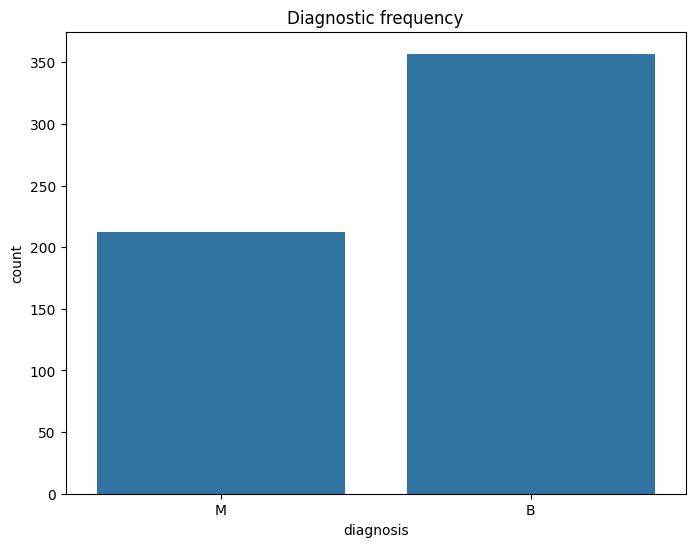

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='diagnosis', data=data_df)
plt.title('Diagnostic frequency')
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

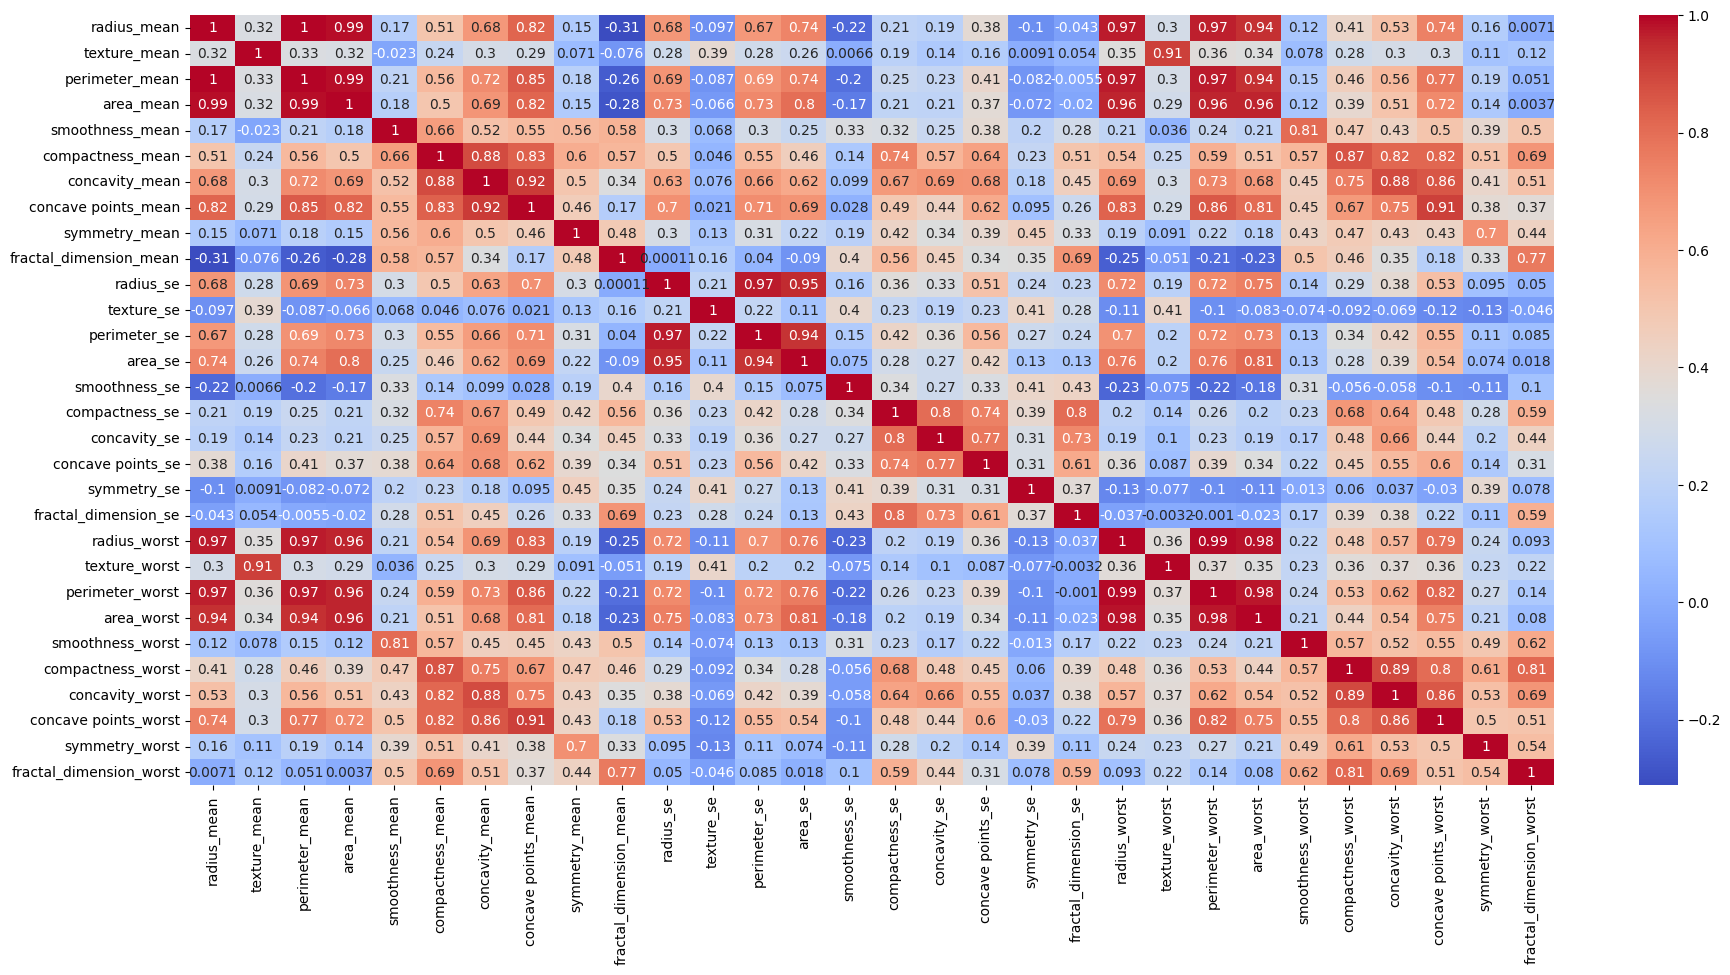

In [12]:
plt.figure(figsize=(22,10))

correlation_matrix = data_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.show()

In [13]:
correlation_matrix = correlation_matrix.abs()

threshold = 0.85

high_corr_var = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_var.add(colname)

print("Columns with potential multicollinearity:")
print(high_corr_var)

Columns with potential multicollinearity:
{'texture_worst', 'concavity_worst', 'concavity_mean', 'concave points_worst', 'area_mean', 'area_worst', 'perimeter_se', 'concave points_mean', 'compactness_worst', 'perimeter_worst', 'radius_worst', 'area_se', 'perimeter_mean'}


Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

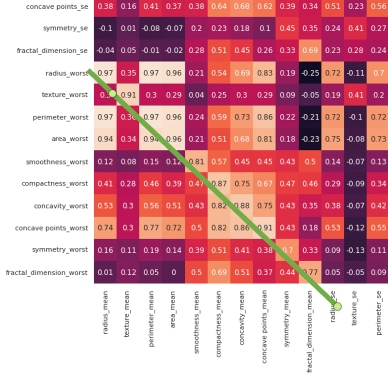

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [14]:
worst_cols = [col for col in data_df.columns if '_worst' in col]
data_df = data_df.drop(columns=worst_cols)

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




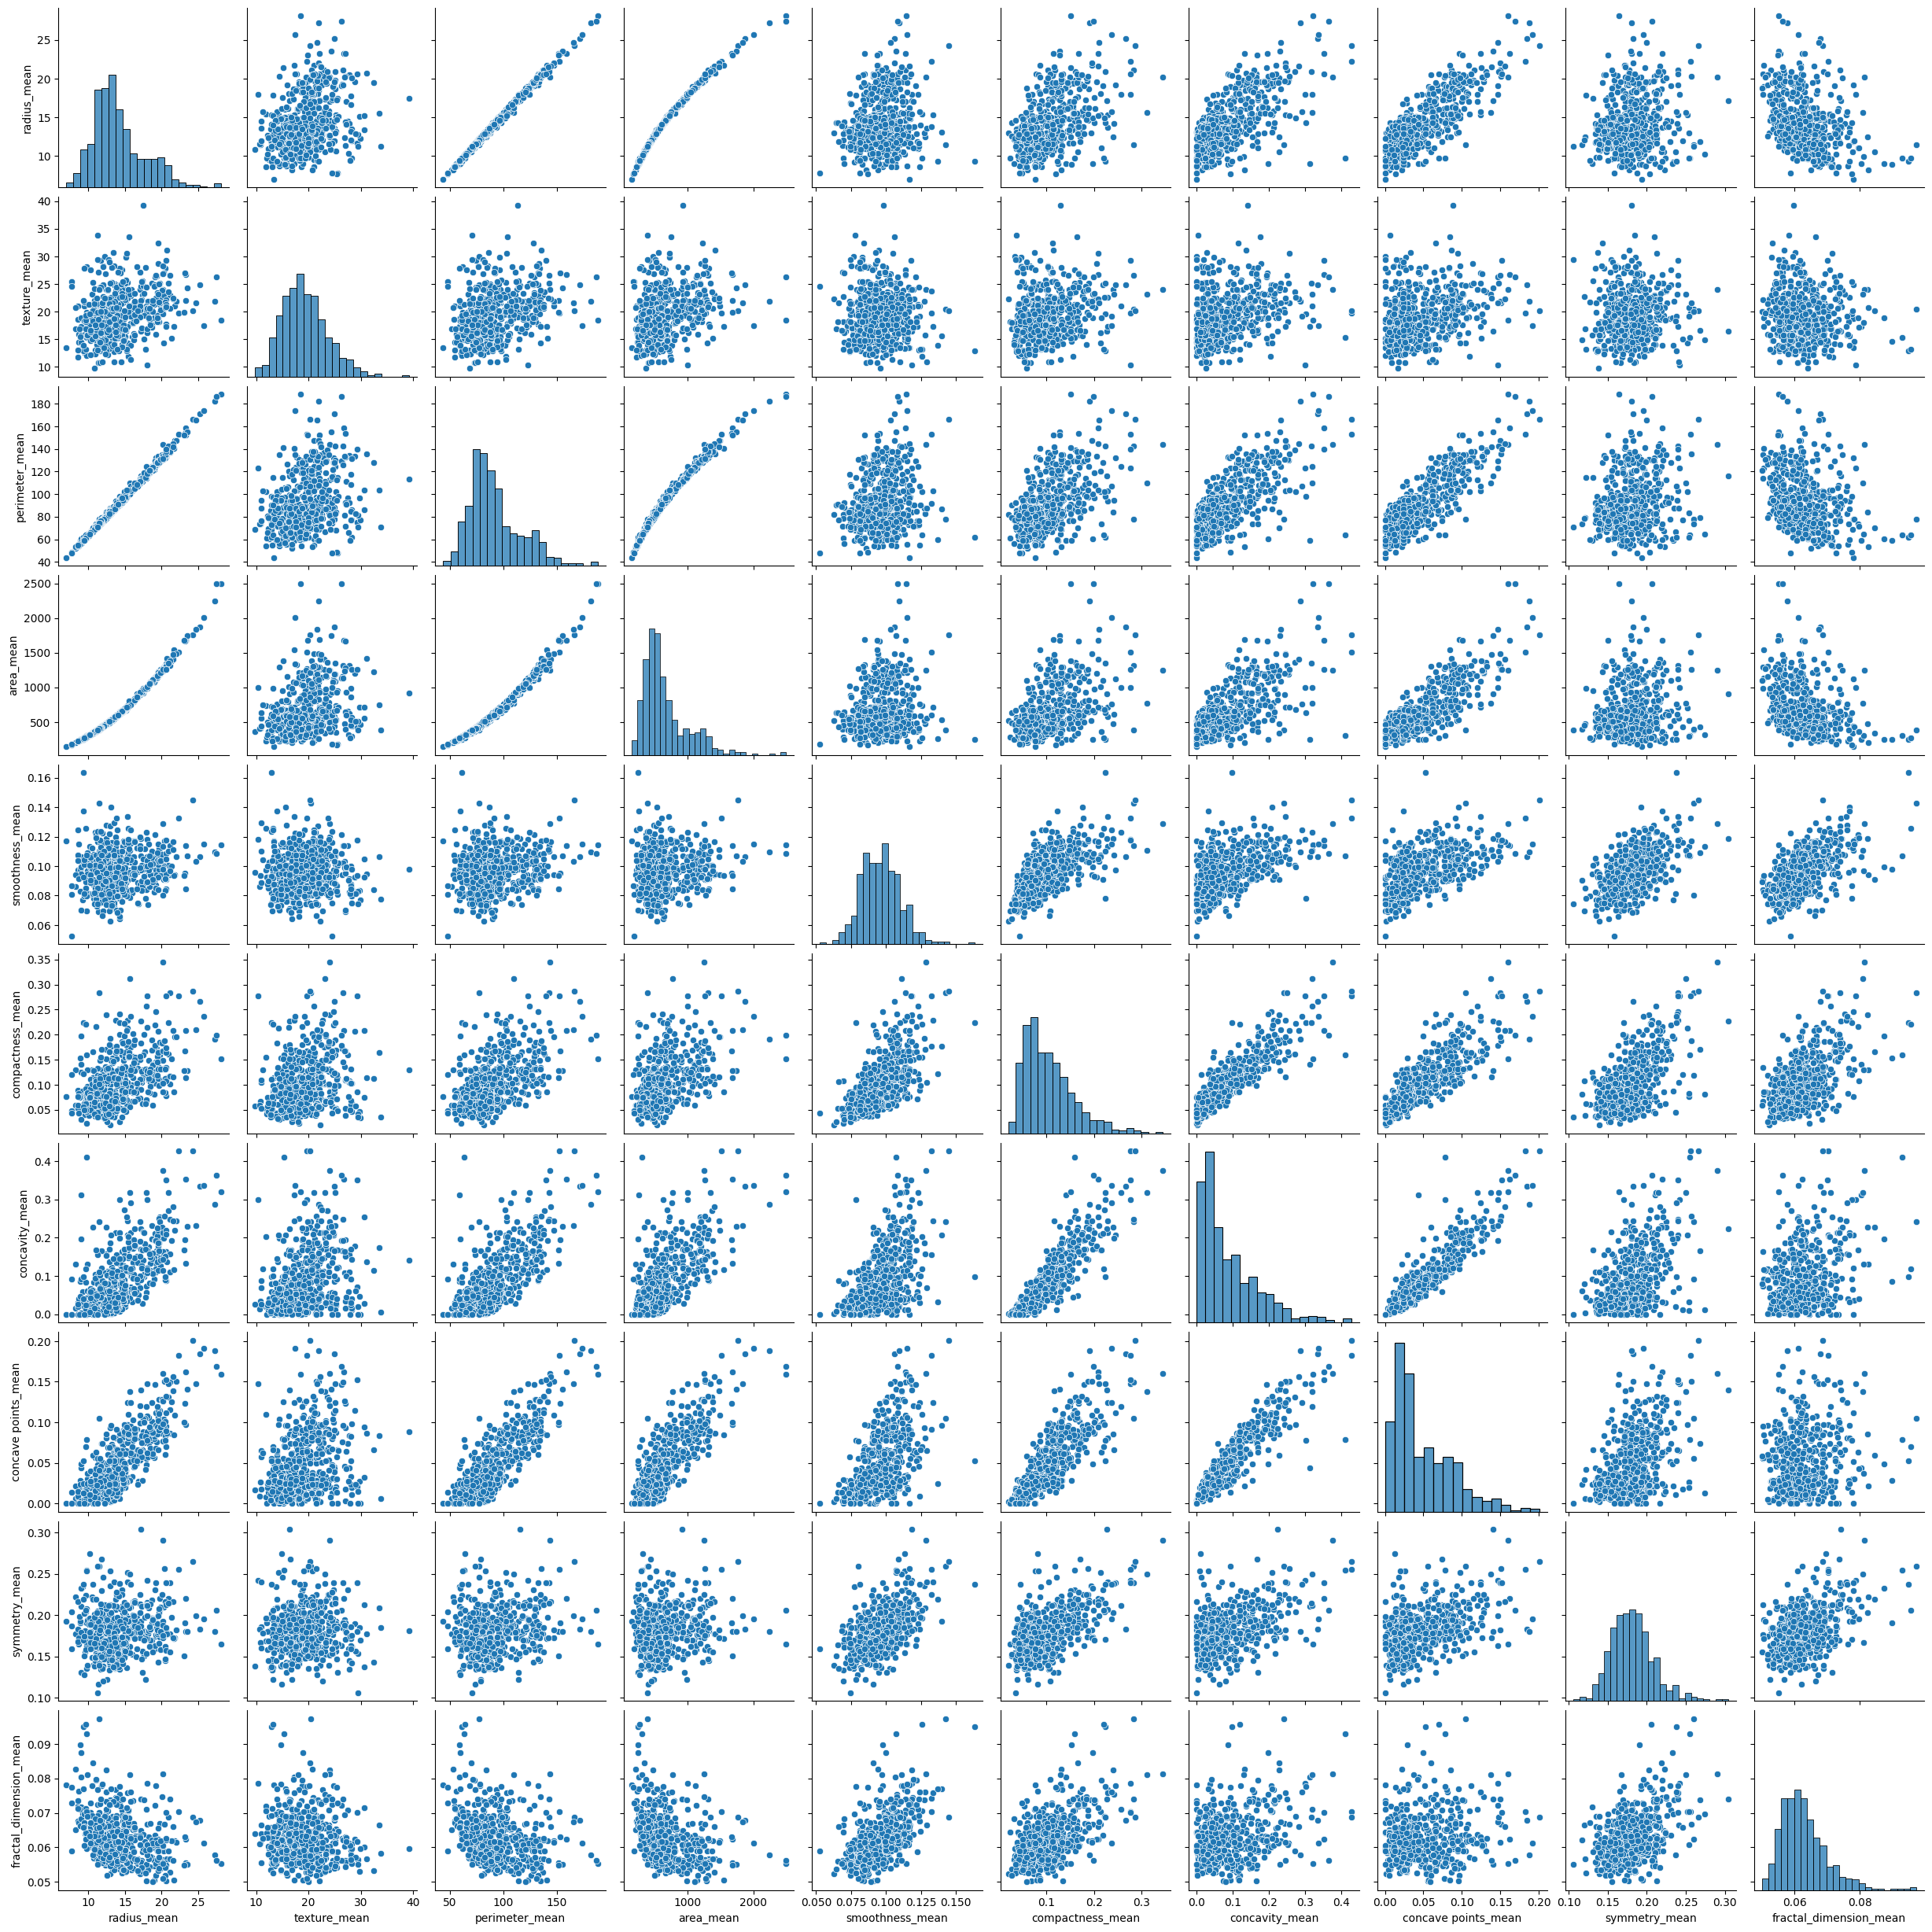

In [15]:
sns.pairplot(
    data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean'
    ]]
) 

plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


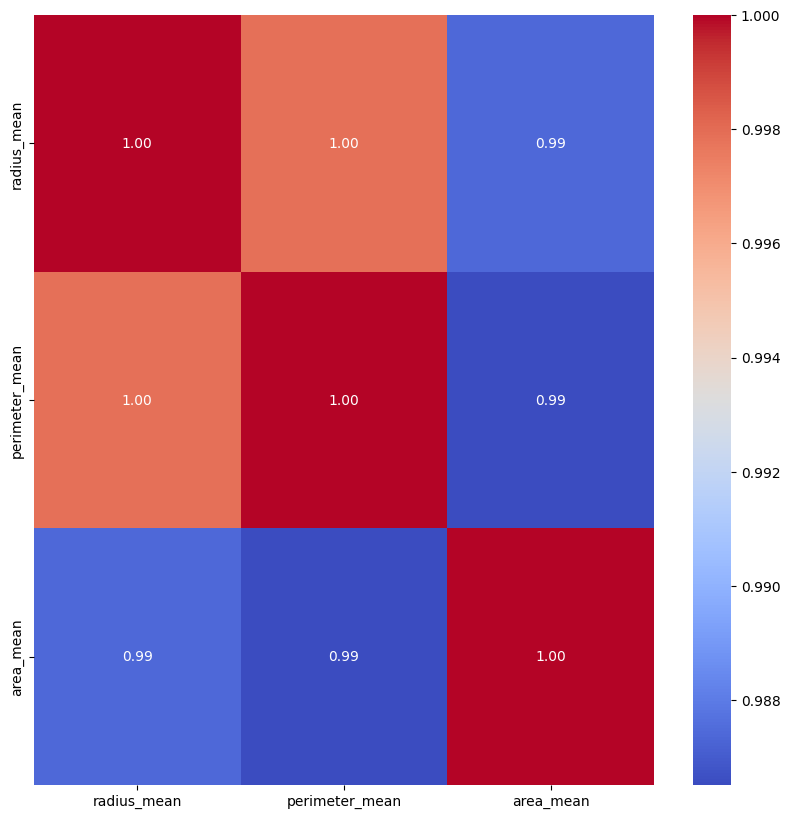

In [16]:
plt.figure(figsize=(10, 10))

correlation_matrix = data_df[['radius_mean' ,'perimeter_mean', 'area_mean']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

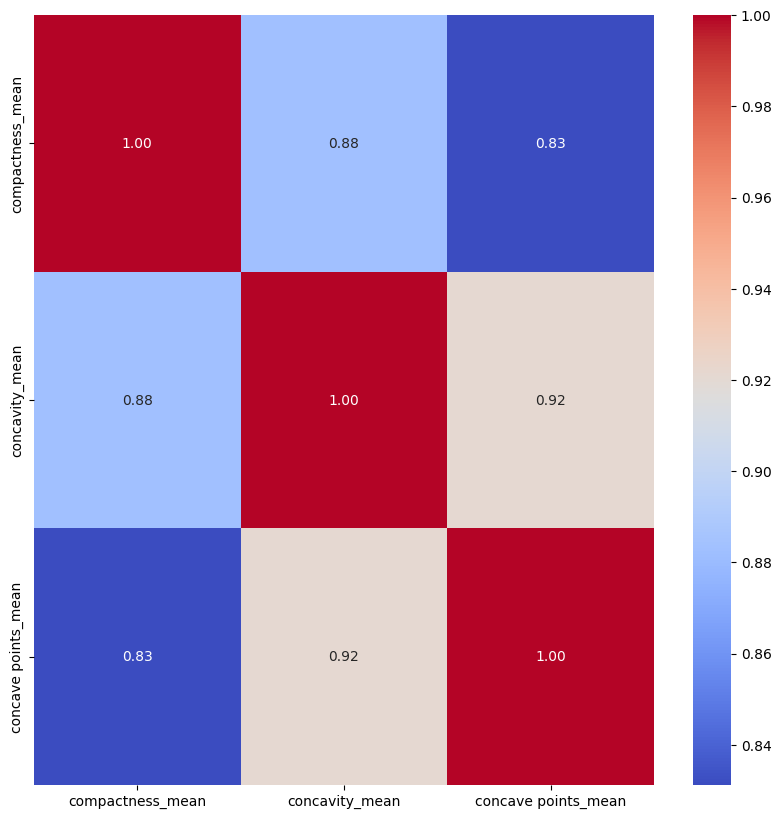

In [17]:
plt.figure(figsize=(10, 10))

correlation_matrix = data_df[['compactness_mean', 'concavity_mean', 'concave points_mean']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

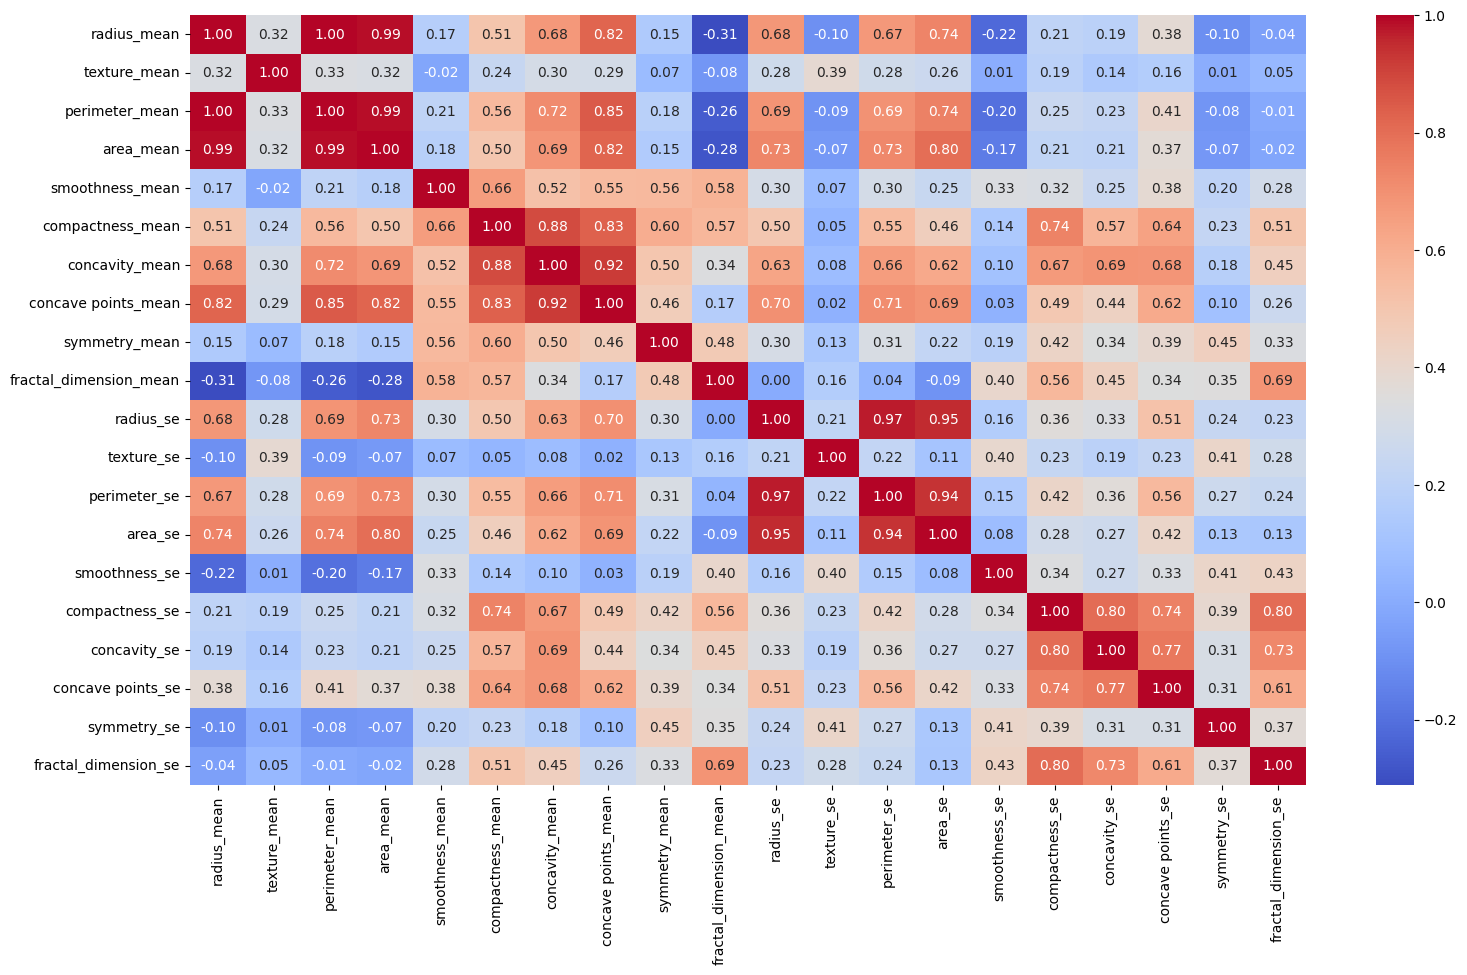

In [18]:

numerical_columns = data_df.select_dtypes(include=np.number).columns
plt.figure(figsize=(18, 10))
correlation_matrix = data_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [19]:
delete = ['concavity', 'concave points', 'perimeter', 'area']
columns_to_drop = [f"{feature}{suffix}" for feature in delete for suffix in ['_mean', '_se']]
data_df.drop(columns=columns_to_drop, axis=1, inplace=True)

data_df.T

id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809,0.2087,0.1794,0.2196,0.235,0.203,...,0.1388,0.1537,0.106,0.2128,0.2149,0.1726,0.1752,0.159,0.2397,0.1587
fractal_dimension_mean,0.07871,0.05667,0.05999,0.09744,0.05883,0.07613,0.05742,0.07451,0.07389,0.08243,...,0.0657,0.06171,0.05502,0.07152,0.06879,0.05623,0.05533,0.05648,0.07016,0.05884
radius_se,1.095,0.5435,0.7456,0.4956,0.7572,0.3345,0.4467,0.5835,0.3063,0.2976,...,0.2388,0.3645,0.3141,0.2602,0.9622,1.176,0.7655,0.4564,0.726,0.3857
texture_se,0.9053,0.7339,0.7869,1.156,0.7813,0.8902,0.7732,1.377,1.002,1.599,...,2.904,1.492,3.896,1.205,1.026,1.256,2.463,1.075,1.595,1.428
smoothness_se,0.006399,0.005225,0.00615,0.00911,0.01149,0.00751,0.004314,0.008805,0.005731,0.007149,...,0.0082,0.007256,0.007594,0.004625,0.006399,0.0103,0.005769,0.005903,0.006522,0.007189


Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

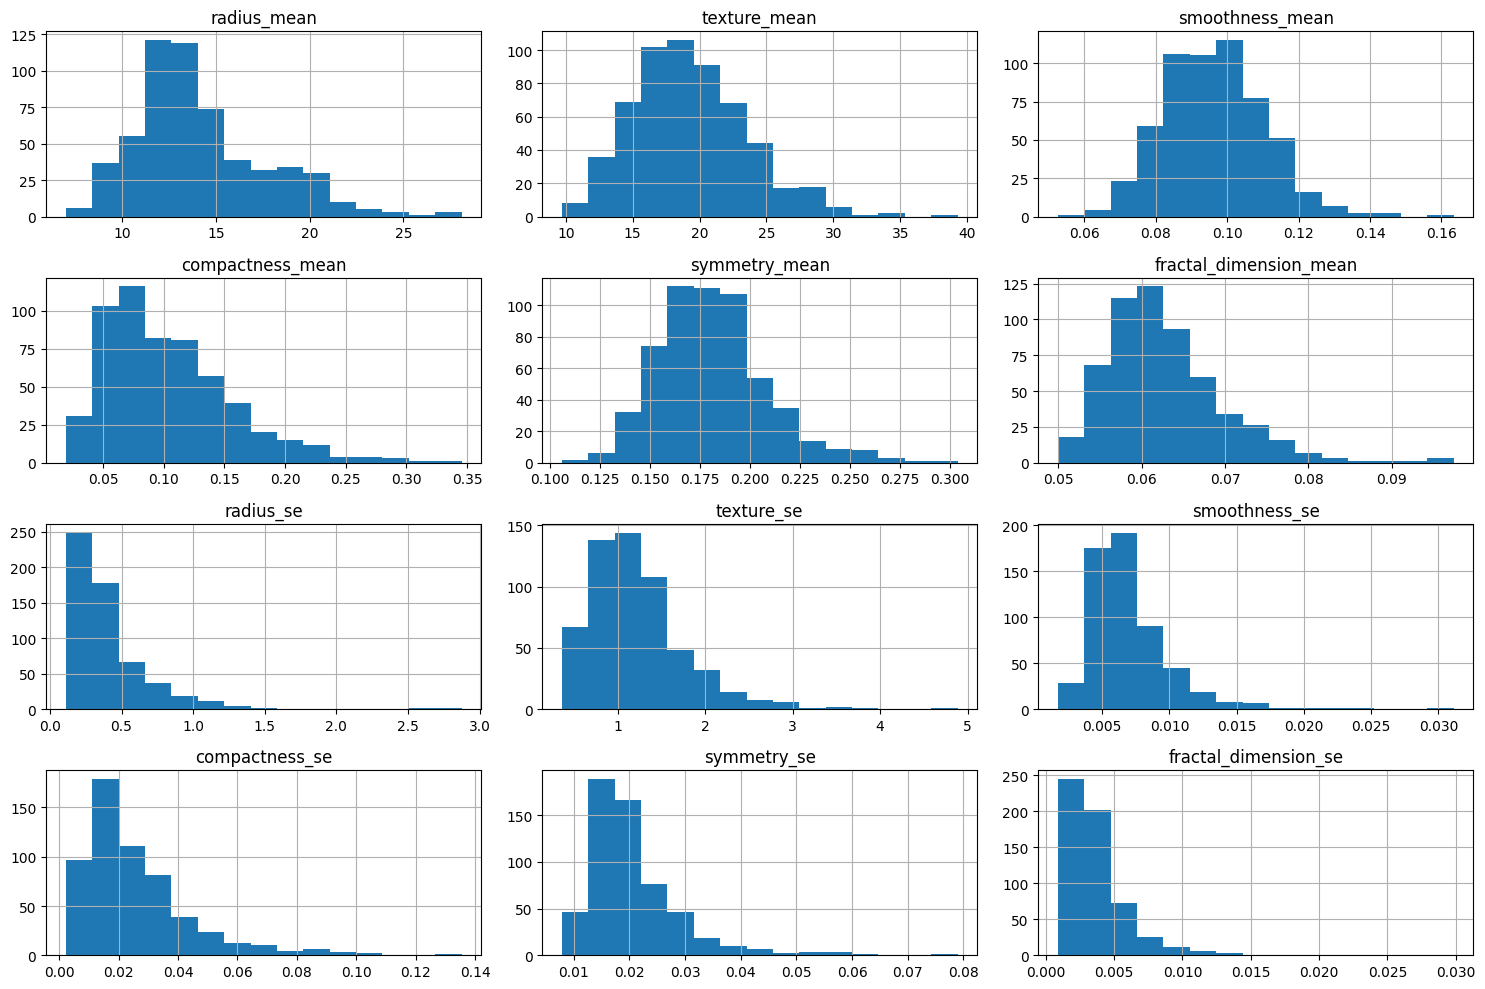

In [20]:
data_df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()



In [21]:
numerical_columns = data_df.select_dtypes(include=np.number).columns
skewness = data_df[numerical_columns].skew()

skew_cols = skewness[skewness > 1].index.tolist()
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


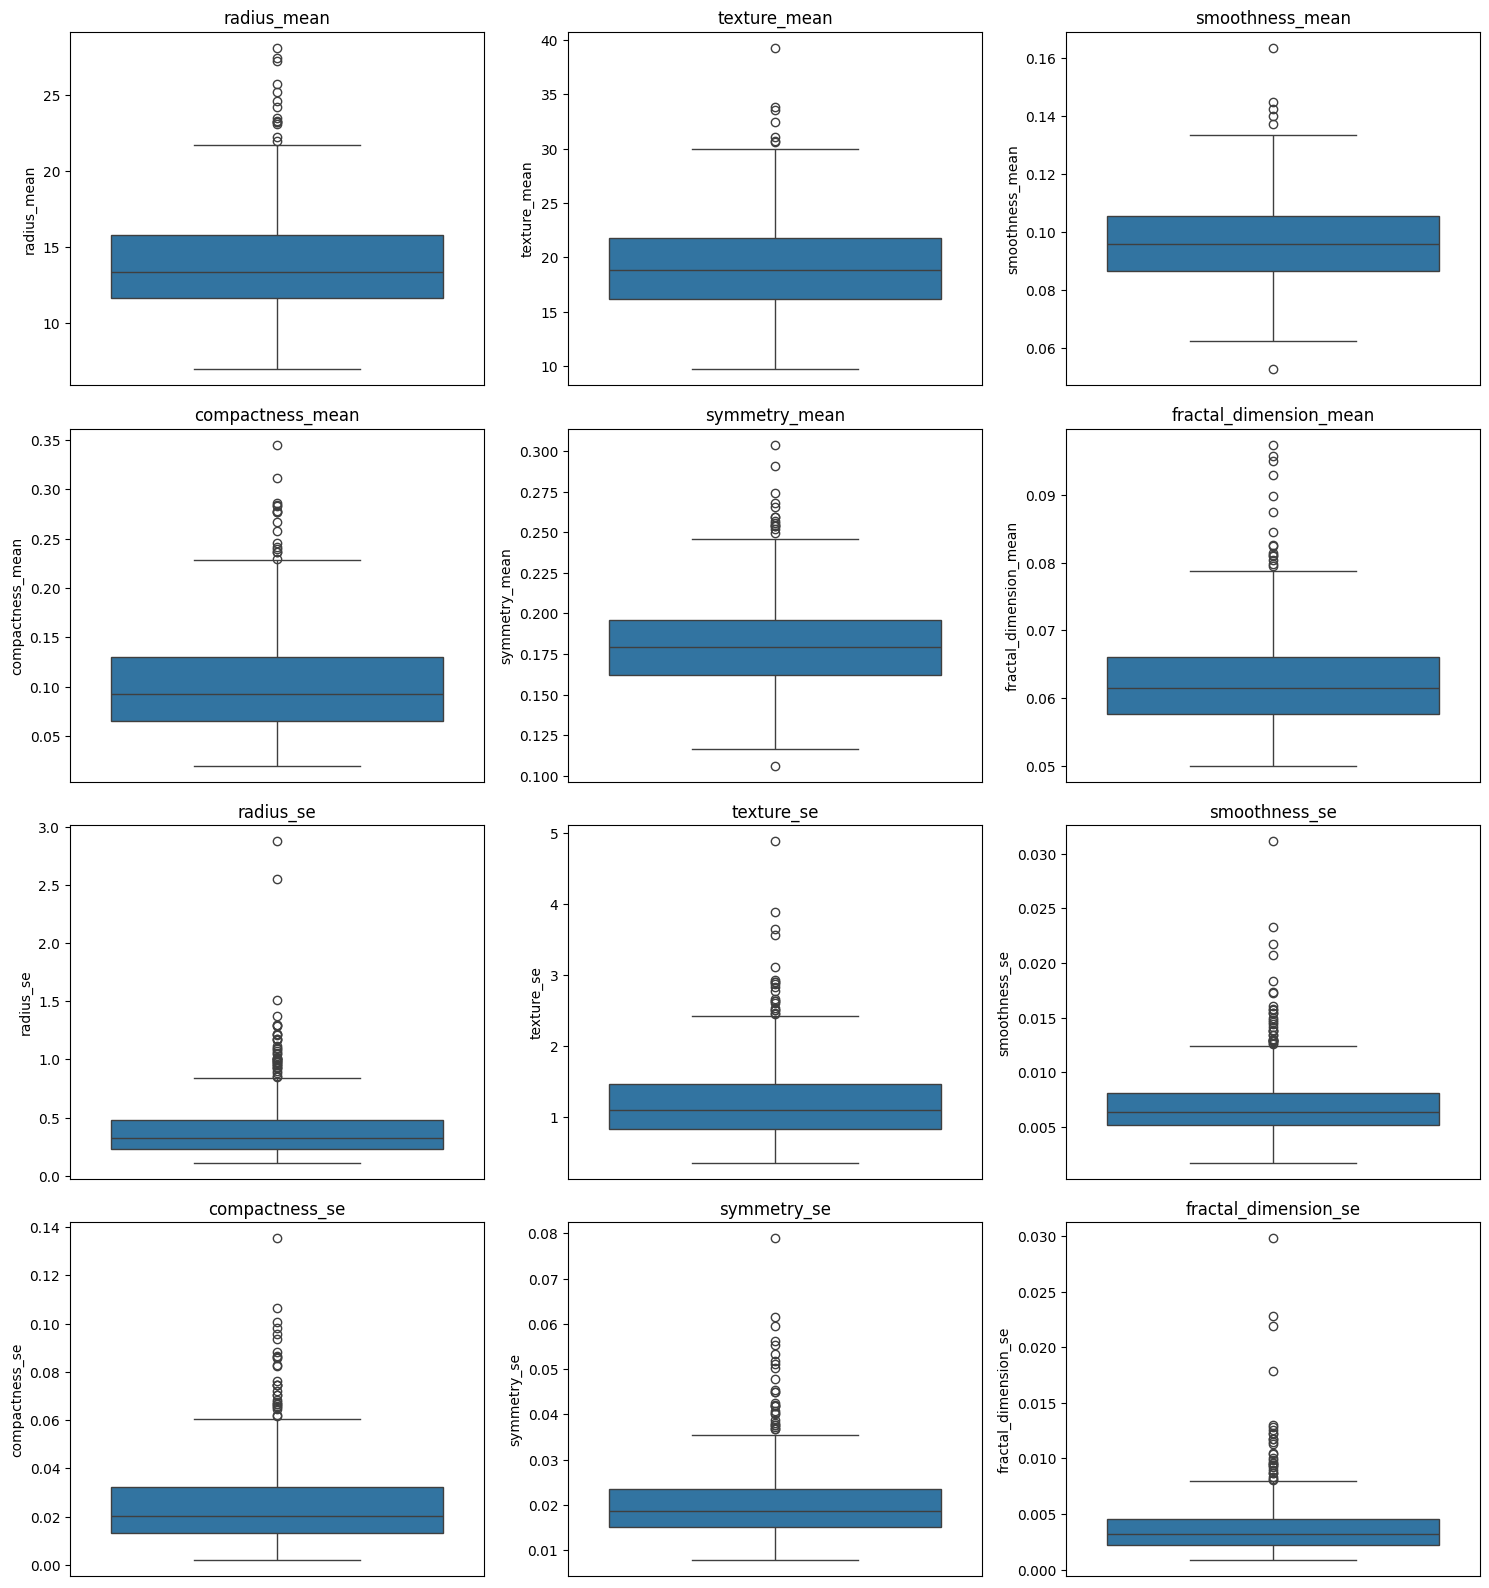

In [22]:
n_vars = len(numerical_columns)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4*n_rows))

for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=data_df[column])
    plt.title(column)
    plt.xticks([])


plt.tight_layout()
plt.show()

In [23]:
scale_cols = [col for col in numerical_columns if data_df[col].min() < 0 or data_df[col].max() > 1]
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [24]:
from sklearn.model_selection import train_test_split

data_df = pd.read_csv('data.csv')

data_df.set_index('id', inplace=True)

X = data_df.drop(columns=['diagnosis'])
y = data_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

worst_cols = [col for col in data_df.columns if '_worst' in col]
mean_cols_to_drop = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
se_cols_to_drop = ['perimeter_se', 'area_se', 'concavity_se', 'concave points_se']

cols_to_drop = worst_cols + mean_cols_to_drop + se_cols_to_drop

drop_columns_lambda = lambda X: X.drop(columns=cols_to_drop, errors='ignore')

preprocessing = ColumnTransformer(
    transformers=[
        ('drop_cols', FunctionTransformer(drop_columns_lambda, validate=False), cols_to_drop)
    ],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import root_mean_squared_error, r2_score


logr_model = Pipeline([
    ('preprocessing', preprocessing),
    ('logr', LogisticRegression(solver='liblinear'))
])
logr_model.fit(X_train, y_train)

y_pred = logr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])


print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.885965
Precision: 0.967742
Recall: 0.714286
Confusion Matrix:
[[71  1]
 [12 30]]


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [27]:
from sklearn.preprocessing import MinMaxScaler

preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_cols', FunctionTransformer(drop_columns_lambda, validate=False), cols_to_drop),
        ('square_root', FunctionTransformer(np.sqrt, validate=False), skew_cols),
        ('minmax_scaler', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)


logr_model2 = Pipeline([
    ('preprocessing', preprocessing2),
    ('logr', LogisticRegression(solver='liblinear'))
])



6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [28]:
logr_model2.fit(X_train, y_train)

y_pred = logr_model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])


print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.903509
Precision: 1.000000
Recall: 0.738095
Confusion Matrix:
[[72  0]
 [11 31]]


# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [30]:
pca = PCA(n_components=0.99) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f'Number of components to explain 99% of variance: {pca.n_components_}')

Number of components to explain 99% of variance: 17


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.pipeline import Pipeline

logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.99)),
    ('logr', LogisticRegression(solver='liblinear'))
]) red)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

print(f'Accuracy: {accuracy:.6f}')
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.982456
Precision: 1.000000
Recall: 0.952381
Confusion Matrix:
[[72  0]
 [ 2 40]]


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

En un modelo de diagnóstico médico, si bien todas las métricas son relevantes, considero que debemos prestar especial atención a los falsos negativos que podemos observar en la matriz de confusión. En este caso, vemos que tenemos 2 falsos negativos, lo cual significa que 2 pacientes fueron clasificados como sanos cuando en realidad tenían la enfermedad. Este tipo de error es especialmente crítico en medicina, ya que puede resultar en retrasos en el tratamiento con consecuencias potencialmente graves para el paciente.

Para minimizar los falsos negativos, podríamos disminuir el threshold del modelo (por defecto 0.5). Esto haría que el modelo sea más sensible y clasifique más casos como positivos, aumentando el recall (actualmente en 0.952) aunque posiblemente a costa de reducir algo la precisión (actualmente en 1.0).

Es importante mencionar que en aplicaciones médicas se requiere un nivel de precisión extremadamente alto. Por esta razón, considero que los modelos de inteligencia artificial en medicina deberían utilizarse como herramientas de apoyo para validar y complementar el diagnóstico del médico, no como sistemas autónomos de diagnóstico. El criterio clínico, la experiencia y el juicio profesional del médico deben seguir siendo el factor principal en la toma de decisiones médicas.
